In [15]:
# SGD - Stochastic Gradient Descent
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import argparse

def sigmoid_activation(x):
    # compute the sigmoid activation value for a given input
    return 1.0 / (1 + np.exp(-x))

def predict(X, W):
    # take the dot product between our features and weight matrix
    preds = sigmoid_activation(X.dot(W))
    
    # apply a step function to threshold the outputs to binary class labels
    preds[preds <= 0.5] = 0
    preds[preds > 0.5] = 1
    
    return preds

def next_batch(X, y, batchSize):
    # loop over our dataset 'X' in mini-batches, yielding a tuple of the current batched data and labels
    for i in np.arange(0, X.shape[0], batchSize):
        yield (X[i:i+batchSize], y[i:i+batchSize])

In [16]:
ap = argparse.ArgumentParser()
ap.add_argument("-e", "--epochs", type=float, default=100, help="# of epochs")
ap.add_argument("-a", "--alpha", type=float, default=0.01, help="learning rate")
ap.add_argument("-b", "--batch-size", type=int, default=32, help="size of SGD mini-batches")
# args = vars(ap.parse_args())
args = {}
args["epochs"] = 100
args["alpha"] = 0.01
args["batch_size"] = 32
print(args["batch_size"])

32


In [20]:
# generate a 2-class classification problem with 1,000 data points, where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.5, random_state=1)

y = y.reshape((y.shape[0], 1))

# insert a column of 1's as the last entryu in the feature matrix -- this little trick allows us to treat the bias as a trainable paramenter within the weight matrix
X = np.c_[X, np.ones(X.shape[0])]

(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.5, random_state=42)


In [21]:
# initalize our weight matrix and list of losses
print("[INFO] training...")
W = np.random.randn(X.shape[1], 1)

losses = []

# loop over the desired number of epochs
for epoch in np.arange(0, args["epochs"]):
    # initialize the total loss for the epoch
    epochLosses = []
    
    # loop over our data in batches
    for (batchX, batchY) in next_batch(X, y, args["batch_size"]):
        preds = sigmoid_activation(batchX.dot(W))
    
        error = preds - batchY
        epochLoss = np.sum(error ** 2)
        epochLosses.append(epochLoss)
    
        gradient = batchX.T.dot(error)
    
        W += -args["alpha"] * gradient
    
    loss = np.average(epochLoss)
    losses.append(loss)
    
    if epoch == 0 or (epoch + 1) % 5 == 0:
        print("[INFO] epoch={}, lose={:.7f}".format(int(epoch + 1), loss))
        
print("[INFO] evaluating...")
preds = predict(testX, W)
print(classification_report(testY, preds))
print(W)

[INFO] training...
[INFO] epoch=1, lose=0.0000581
[INFO] epoch=5, lose=0.0000009
[INFO] epoch=10, lose=0.0000001
[INFO] epoch=15, lose=0.0000000
[INFO] epoch=20, lose=0.0000000
[INFO] epoch=25, lose=0.0000000
[INFO] epoch=30, lose=0.0000000
[INFO] epoch=35, lose=0.0000000
[INFO] epoch=40, lose=0.0000000
[INFO] epoch=45, lose=0.0000000
[INFO] epoch=50, lose=0.0000000
[INFO] epoch=55, lose=0.0000000
[INFO] epoch=60, lose=0.0000000
[INFO] epoch=65, lose=0.0000000
[INFO] epoch=70, lose=0.0000000
[INFO] epoch=75, lose=0.0000000
[INFO] epoch=80, lose=0.0000000
[INFO] epoch=85, lose=0.0000000
[INFO] epoch=90, lose=0.0000000
[INFO] epoch=95, lose=0.0000000
[INFO] epoch=100, lose=0.0000000
[INFO] evaluating...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

   micro avg       1.00      1.00      1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg     

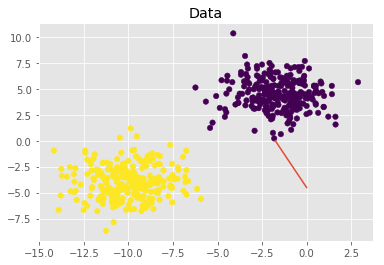

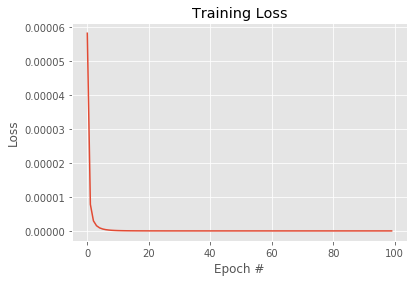

In [22]:
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY.flatten(), s=30)
plt.plot([W[0]+W[2],0], [0, W[1]+W[2]])

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()
